# Data Preprocessing and Machine Learning Modeling

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [65]:
file_path = '../dataset/'

app_train_df = pd.read_csv(file_path + 'application_train.csv')
app_test_df = pd.read_csv(file_path + 'application_test.csv')

## Feature Selection from EDA

In [66]:
features = app_train_df.columns.tolist()

low_var_features = ['REGION_POPULATION_RELATIVE', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'LANDAREA_AVG', 
                    'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 
                    'COMMONAREA_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 
                    'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 
                    'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI'
                    ]

high_corr_features = ['AMT_GOOD_PRICE', 'AMT_CREDIT', 'ELEVATOR_MODE', 'ELEVATOR_AVG', 'ELEVATOR_MODE', 'LIVINGAREA_MODE', 
                        'LIVINGAREA_MEDI', 'TOTALAREA_MODE', 'YEARS_BUILD_MODE', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
                        'NONLIVINGAPARTMENTS_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'NONLIVINGAPARTMENTS_MODE',
                        'NONLIVINGAPARTMENTS_MEDI', 'APARTMENTS_AVG',
                        'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'ELEVATORS_AVG',
                        'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG',
                        'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
                        'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
                        'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'APARTMENTS_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
                        'YEARS_BUILD_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI',
                        'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
                        'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                        'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_WORK_REGION', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'ELEVATORS_MEDI',
                        'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI',
                        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'ELEVATORS_AVG',
                        'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
                        'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'ELEVATORS_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'YEARS_BUILD_AVG',
                        'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'ELEVATORS_MODE',
                        'LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'YEARS_BUILD_MEDI', 'FLOORSMAX_MEDI', 'LIVINGAREA_MEDI',
                        'HOUSETYPE_MODE',
                    ]

period_features = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                    'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_REGISTRATION'
                    ]

high_cardinality_features = ['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
                            'LIVE_REGION_NOT_WORK_REGION', 'REGION_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2' 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 
                            'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
                            'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 
                            'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                            'AMT_REQ_CREDIT_BUREAU_YEAR', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                            'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE']

useless_features = ['NAME_TYPE_SUITE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'REGION_RATING_CLIENT_W_CITY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT']

In [69]:
for ft in features:
    if (ft in low_var_features):
        features.remove(ft)

for ft in features:
    if (ft in high_corr_features) or (ft in period_features) or (ft in high_cardinality_features) or (ft in useless_features):
        features.remove(ft)

for ft in features:
    if (ft in high_cardinality_features) or (ft in useless_features):
        features.remove(ft)

for ft in features:
    if (ft in useless_features):
        features.remove(ft)
        
features 

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'ELEVATORS_MODE',
 'NONLIVINGAREA_MODE',
 'FLOORSMAX_MEDI',
 'WALLSMATERIAL_MODE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_20']

In [70]:
len(features)

32

## Missing values analysis

In [71]:
missing_summary = pd.DataFrame({
    'Feature': features,
    'Missing Count': app_train_df[features].isna().sum(),
    'Missing Percentage (%)': (app_train_df[features].isna().sum() / len(app_train_df)) * 100
})

# Filter only features with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

# Sort by Missing Count in descending order
missing_summary = missing_summary.sort_values(by='Missing Count', ascending=False).reset_index(drop=True)

# Display the summary table
missing_summary


,Feature,Missing Count,Missing Percentage (%)
0,EXT_SOURCE_1,173378,56.381073
1,NONLIVINGAREA_MODE,169682,55.179164
2,ELEVATORS_MODE,163891,53.295980
3,WALLSMATERIAL_MODE,156341,50.840783
4,FLOORSMAX_AVG,153020,49.760822
5,FLOORSMAX_MEDI,153020,49.760822
6,OCCUPATION_TYPE,96391,31.345545
7,EXT_SOURCE_3,60965,19.825307
8,EXT_SOURCE_2,660,0.214626
9,AMT_GOODS_PRICE,278,0.090403


In [37]:
# Filter out features with missing percentage > 20%
high_missing_features = missing_summary[missing_summary['Missing Percentage (%)'] > 20]['Feature'].tolist()

# Remove these features from the 'features' list
features = [feature for feature in features if feature not in high_missing_features]

# Display the updated features list
print(f"Number of remaining features: {len(features)}")
print("Removed Features (More than 20% missing):", high_missing_features)

Number of remaining features: 28
Removed Features (More than 20% missing): ['YEARS_BUILD_MEDI', 'EXT_SOURCE_1', 'ELEVATORS_MODE', 'LIVINGAREA_MEDI', 'FLOORSMAX_AVG', 'OCCUPATION_TYPE']


In [72]:
# Identify features with missing percentage <= 20%
low_missing_features = missing_summary[missing_summary['Missing Percentage (%)'] <= 20]['Feature'].tolist()

# Fill missing values with median for these features
for feature in low_missing_features:
    median_value = app_train_df[feature].median()
    app_train_df[feature].fillna(median_value, inplace=True)

print("Filled missing values (<= 20%) with median for selected features.")

Filled missing values (<= 20%) with median for selected features.


## Remove duplicates

In [73]:
# Detect duplicate rows based on the 'features' list
duplicate_rows = app_train_df.duplicated(subset=features, keep='first')

# Count the number of duplicates
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display the first few duplicate rows (if any)
if num_duplicates > 0:
    print(app_train_df[duplicate_rows].head())

Number of duplicate rows: 0


## Outliers Handling

In [74]:
app_train_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SK_ID_CURR               307511 non-null  int64  
 1   TARGET                   307511 non-null  int64  
 2   NAME_CONTRACT_TYPE       307511 non-null  object 
 3   CODE_GENDER              307511 non-null  object 
 4   FLAG_OWN_CAR             307511 non-null  object 
 5   FLAG_OWN_REALTY          307511 non-null  object 
 6   CNT_CHILDREN             307511 non-null  int64  
 7   AMT_ANNUITY              307511 non-null  float64
 8   AMT_GOODS_PRICE          307511 non-null  float64
 9   NAME_INCOME_TYPE         307511 non-null  object 
 10  NAME_EDUCATION_TYPE      307511 non-null  object 
 11  NAME_FAMILY_STATUS       307511 non-null  object 
 12  FLAG_EMP_PHONE           307511 non-null  int64  
 13  FLAG_WORK_PHONE          307511 non-null  int64  
 14  FLAG

In [75]:
app_train_df['CNT_FAM_MEMBERS'] = app_train_df['CNT_FAM_MEMBERS'].astype('int64')

In [76]:
numerical_features = ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']


c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

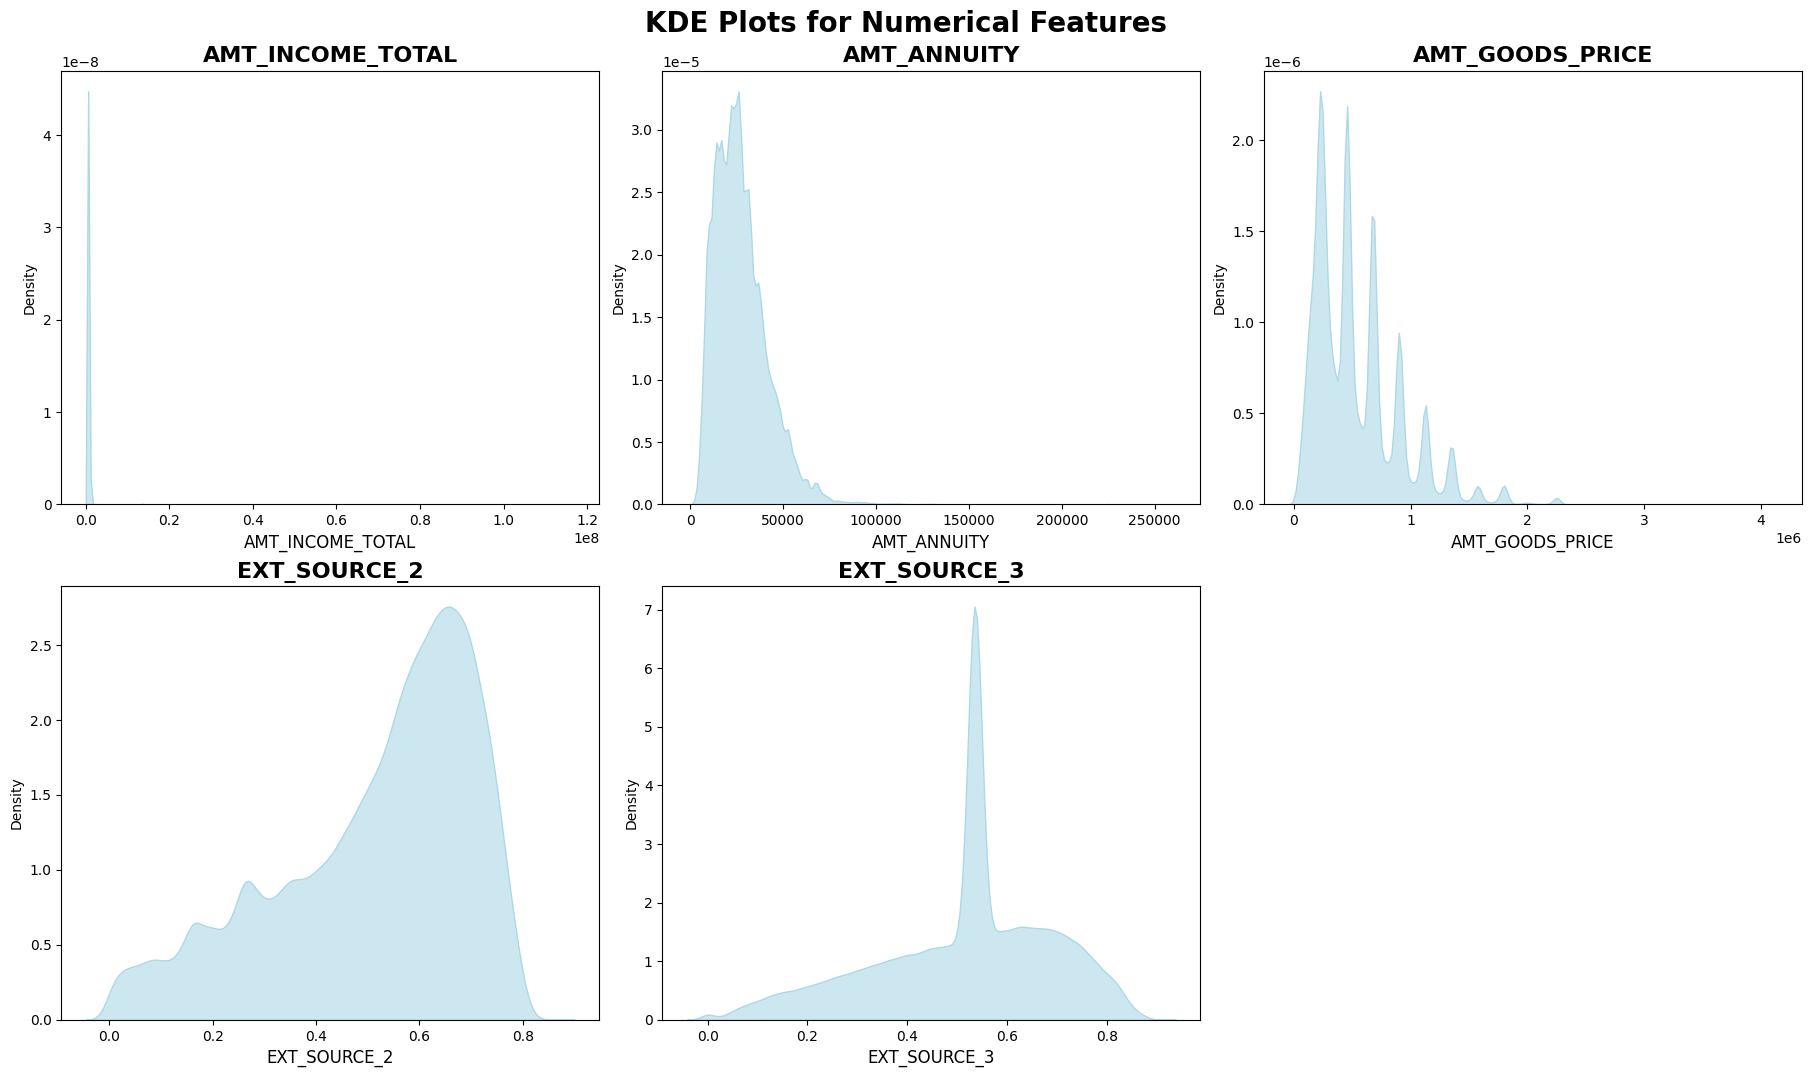

In [77]:
num_rows = (len(numerical_features) + 1) // 2
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("KDE Plots for Numerical Features", fontsize=20, fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.kdeplot(data=app_train_df, x=col, ax=axes[i], fill=True, color="lightblue", alpha=0.6)
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

In [78]:
# Detect outliers using IQR method
Q1 = app_train_df[numerical_features].quantile(0.25)
Q3 = app_train_df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

outliers_IQR = ((app_train_df[numerical_features] < (Q1 - 1.5 * IQR)) | (app_train_df[numerical_features] > (Q3 + 1.5 * IQR)))

outliers_count_IQR = outliers_IQR.sum()

outliers_percentage = (outliers_count_IQR / app_train_df.shape[0]) * 100

num_desc_stats = app_train_df[numerical_features].describe().transpose()

# Add additional statistics
num_desc_stats['outlier_count'] = outliers_count_IQR
num_desc_stats['outliers (%)'] = outliers_percentage

num_desc_stats.head(5)

,count,mean,std,min,25%,50%,75%,max,outlier_count,outliers (%)
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08,14035,4.564064
AMT_ANNUITY,307511.0,27108.487841,14493.461065,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05,7504,2.440238
AMT_GOODS_PRICE,307511.0,538316.294367,369288.982246,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06,14728,4.789422
EXT_SOURCE_2,307511.0,0.514503,0.190870,8.173617e-08,0.392974,0.565961,0.663422,8.549997e-01,0,0.000000
EXT_SOURCE_3,307511.0,0.515695,0.174736,5.272652e-04,0.417100,0.535276,0.636376,8.960095e-01,4313,1.402551


In [79]:
print(features)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'ELEVATORS_MODE', 'NONLIVINGAREA_MODE', 'FLOORSMAX_MEDI', 'WALLSMATERIAL_MODE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_20']


In [80]:
# Create a boolean mask for rows without outliers
non_outlier_mask = ~((app_train_df[numerical_features] < (Q1 - 1.5 * IQR)) | 
                     (app_train_df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter the DataFrame to keep only non-outlier rows
app_train_df = app_train_df[non_outlier_mask].reset_index(drop=True)

print(f"Outliers removed. Remaining rows: {app_train_df.shape[0]}")

Outliers removed. Remaining rows: 275054


## Feature transformation

In [ ]:
# Log-p transformation for 

## Feature Encoding

In [81]:
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8']

C:\Users\fizuf\AppData\Local\Temp\ipykernel_24380\4179092565.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


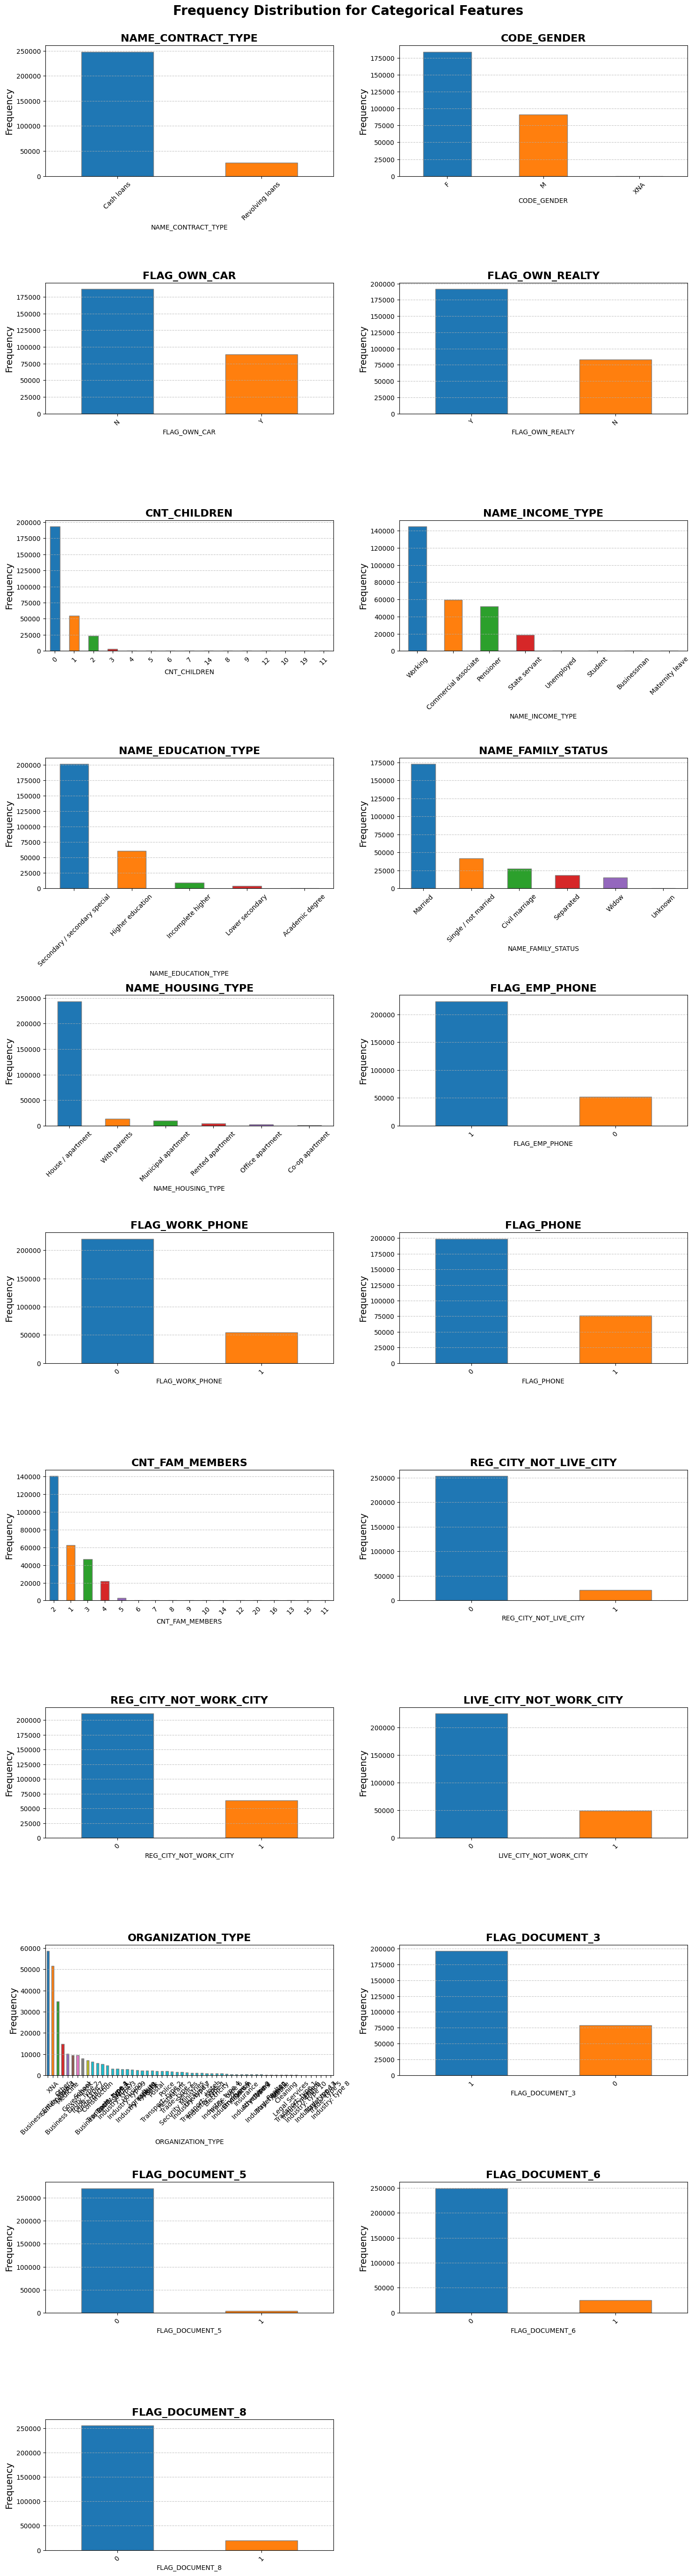

In [82]:
num_rows = (len(categorical_features) + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows), constrained_layout=True)

fig.suptitle("Frequency Distribution for Categorical Features", fontsize=20, fontweight='bold', y=1.001)

for i, column in enumerate(categorical_features):
    row, col = divmod(i, 2) 
    ax = axes[row, col]
    
    value_counts = app_train_df[column].value_counts()
    colors = plt.cm.tab10(range(len(value_counts)))
    
    value_counts.plot(kind="bar", ax=ax, color=colors, edgecolor="grey")
    
    ax.set_title(f"{column}", fontsize=16, fontweight='bold')
    ax.set_ylabel("Frequency", fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', labelrotation=45)

for j in range(len(categorical_features), num_rows * 2):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [63]:
app_train_df['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Pensioner', 'Commercial associate',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [84]:
app_train_df['CODE_GENDER'] = app_train_df['CODE_GENDER'].replace('XNA', 'F')
app_train_df['NAME_EDUCATION_TYPE'] = app_train_df['NAME_EDUCATION_TYPE'].replace('Academic degree', 'Secondary / secondary special')
app_train_df['NAME_INCOME_TYPE'] = app_train_df['NAME_INCOME_TYPE'].replace(
                                                ['Unemployed', 'Student', 'Businessman', 'Maternity leave'], 'Working')
app_train_df['NAME_FAMILY_STATUS'] = app_train_df['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')

In [86]:
app_train_df['NAME_CONTRACT_TYPE'] = app_train_df['NAME_CONTRACT_TYPE'].replace({'Cash loans': 0, 'Revolving loans': 1})
app_train_df['CODE_GENDER'] = app_train_df['CODE_GENDER'].replace({'F': 0, 'M': 1})
app_train_df['FLAG_OWN_CAR'] = app_train_df['FLAG_OWN_CAR'].replace({'N': 0, 'Y': 1})
app_train_df['FLAG_OWN_REALTY'] = app_train_df['FLAG_OWN_REALTY'].replace({'N': 0, 'Y': 1})
app_train_df['FLAG_EMP_PHONE'] = app_train_df['FLAG_EMP_PHONE'].replace({'N': 0, 'Y': 1})
app_train_df['FLAG_WORK_PHONE'] = app_train_df['FLAG_WORK_PHONE'].replace({'N': 0, 'Y': 1})
app_train_df['FLAG_PHONE'] = app_train_df['FLAG_PHONE'].replace({'N': 0, 'Y': 1})
app_train_df['REG_CITY_NOT_LIVE_CITY'] = app_train_df['REG_CITY_NOT_LIVE_CITY'].replace({'N': 0, 'Y': 1})
app_train_df['REG_CITY_NOT_WORK_CITY'] = app_train_df['REG_CITY_NOT_WORK_CITY'].replace({'N': 0, 'Y': 1})
app_train_df['FLAG_DOCUMENT_3'] = app_train_df['FLAG_DOCUMENT_3'].replace({'N': 0, 'Y': 1})

In [87]:
one_hot = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']

one_hot_df = pd.get_dummies(app_train_df[one_hot], drop_first=False)

# Merge the One-Hot Encoded columns back into the original DataFrame
app_train_df = pd.concat([app_train_df, one_hot_df], axis=1)

# Optionally, drop the original categorical columns
app_train_df = app_train_df.drop(columns=one_hot)

In [89]:
# Replace specific values in 'app_test_df' (similar to 'app_train_df')
app_test_df['CODE_GENDER'] = app_test_df['CODE_GENDER'].replace('XNA', 'F')
app_test_df['NAME_EDUCATION_TYPE'] = app_test_df['NAME_EDUCATION_TYPE'].replace('Academic degree', 'Secondary / secondary special')
app_test_df['NAME_INCOME_TYPE'] = app_test_df['NAME_INCOME_TYPE'].replace(
                                                ['Unemployed', 'Student', 'Businessman', 'Maternity leave'], 'Working')
app_test_df['NAME_FAMILY_STATUS'] = app_test_df['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')

# Replace 'NAME_CONTRACT_TYPE', 'CODE_GENDER', etc., with numerical values
app_test_df['NAME_CONTRACT_TYPE'] = app_test_df['NAME_CONTRACT_TYPE'].replace({'Cash loans': 0, 'Revolving loans': 1})
app_test_df['CODE_GENDER'] = app_test_df['CODE_GENDER'].replace({'F': 0, 'M': 1})
app_test_df['FLAG_OWN_CAR'] = app_test_df['FLAG_OWN_CAR'].replace({'N': 0, 'Y': 1})
app_test_df['FLAG_OWN_REALTY'] = app_test_df['FLAG_OWN_REALTY'].replace({'N': 0, 'Y': 1})
app_test_df['FLAG_EMP_PHONE'] = app_test_df['FLAG_EMP_PHONE'].replace({'N': 0, 'Y': 1})
app_test_df['FLAG_WORK_PHONE'] = app_test_df['FLAG_WORK_PHONE'].replace({'N': 0, 'Y': 1})
app_test_df['FLAG_PHONE'] = app_test_df['FLAG_PHONE'].replace({'N': 0, 'Y': 1})
app_test_df['REG_CITY_NOT_LIVE_CITY'] = app_test_df['REG_CITY_NOT_LIVE_CITY'].replace({'N': 0, 'Y': 1})
app_test_df['REG_CITY_NOT_WORK_CITY'] = app_test_df['REG_CITY_NOT_WORK_CITY'].replace({'N': 0, 'Y': 1})
app_test_df['FLAG_DOCUMENT_3'] = app_test_df['FLAG_DOCUMENT_3'].replace({'N': 0, 'Y': 1})

# Apply One-Hot Encoding to 'app_test_df'
one_hot_df_test = pd.get_dummies(app_test_df[one_hot], drop_first=False)

# Merge the One-Hot Encoded columns back into the original DataFrame
app_test_df = pd.concat([app_test_df, one_hot_df_test], axis=1)

# Optionally, drop the original categorical columns
app_test_df = app_test_df.drop(columns=one_hot)

print("Transformations applied to 'app_test_df'.")


Transformations applied to 'app_test_df'.


In [96]:
final_feats = numerical_features + ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3']

## Train/Test Split

In [97]:
# Assuming 'TARGET' is the column to predict
X_train = app_train_df[final_feats]  # Select all the feature columns (excluding the target)
y_train = app_train_df['TARGET']  # Target column (binary classification task)

X_test = app_test_df[final_feats]

## Modeling

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [100]:
# Define hyperparameters grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
    'penalty': ['l1', 'l2'],               # Type of regularization
    'solver': ['liblinear', 'saga'],       # Optimization algorithm
    'max_iter': [100, 200]                 # Maximum number of iterations
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


In [101]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Best model
best_logreg_model = grid_search.best_estimator_


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
